### Step 1: Import all the libraries I am going to use.

In [2]:
%pylab inline
import seaborn as sns
import pywt
from pywt import wavedec2

Populating the interactive namespace from numpy and matplotlib


### Step 2: Use the function to generate some random noisy fake data with different features; Index positive means more spread out, index negative means more clustered. 

In [3]:
def generate_fake_data(size, index):
    f_fake_data = randn(size, size)
    lx = np.linspace(-1, 1, size)
    ly = np.linspace(-1, 1, size)
    LX, LY = np.meshgrid(lx, ly)
    L = np.sqrt(LX**2 + LY**2)
    ps = L ** index
    ps[0] = 0
    fake_data = np.real(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(ps)*f_fake_data)))
    fake_data = (fake_data - np.mean(fake_data)) / np.std(fake_data)
    return fake_data

### A little bit detour here, let's have some quick sneaks of how many wavelets families are there. 

In [4]:
pywt.families()
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

### Step 3: Now let's explore some data with sparse patterns.

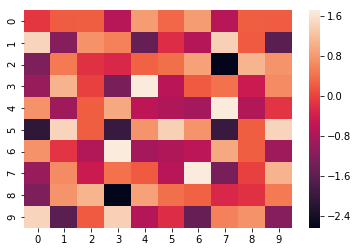

In [8]:
data_sparse=generate_fake_data(10,3)
sns.heatmap(data_sparse)

In [12]:
# Next, I want to apply wavelet 'haar' family to my sparse;
# data, and check our coefficients and how many levels we have

coeffs=wavedec2(data_sparse,'haar')
len(coeffs)-1  # The first element with no imfo in it, so we need to get rid of it, so we have 3 coefficients;
               # represent three different multi-scale levels

3

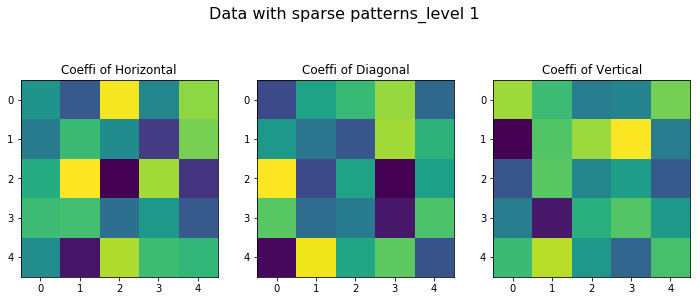

Mean of Horizontal_level(1)= 2.886579864025407e-17
Mean of Diagonal_level(1)= -1.7763568394002505e-17
Mean of Vertical_level(1)= 0.10170514274256039

Standard Deviation of Horizontal_level(1)= 0.89080
Standard Deviation of Diagonal_level(1)= 1.47449
Standard Deviation of Vertical_level(1)= 0.88029

Variance of Horizontal_level(1)= 0.79352
Variance Deviation of Diagonal_level(1)= 2.17412
Variance Deviation of Vertical_level(1)= 0.77490

Sum of variance_level(1)= 3.74254



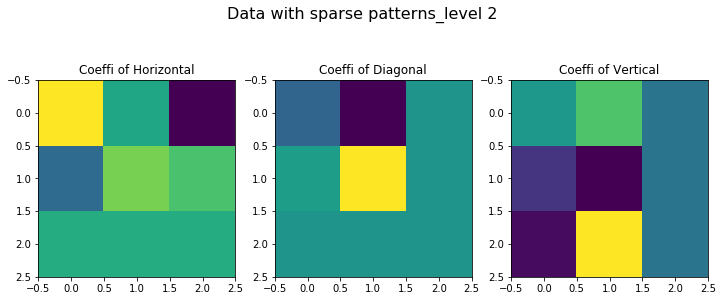

Mean of Horizontal_level(2)= -0.07042805638941879
Mean of Diagonal_level(2)= -0.04407014629145009
Mean of Vertical_level(2)= 0.01699501783883176

Standard Deviation of Horizontal_level(2)= 0.64212
Standard Deviation of Diagonal_level(2)= 0.50252
Standard Deviation of Vertical_level(2)= 0.32350

Variance of Horizontal_level(2)= 0.41232
Variance Deviation of Diagonal_level(2)= 0.25253
Variance Deviation of Vertical_level(2)= 0.10465

Sum of variance_level(2)= 0.76950



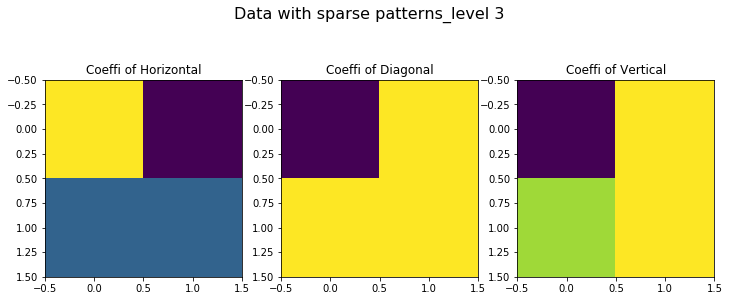

Mean of Horizontal_level(3)= 0.012797465107396561
Mean of Diagonal_level(3)= -0.09120741167852223
Mean of Vertical_level(3)= -0.04887937744026691

Standard Deviation of Horizontal_level(3)= 0.05185
Standard Deviation of Diagonal_level(3)= 0.15798
Standard Deviation of Vertical_level(3)= 0.07129

Variance of Horizontal_level(3)= 0.00269
Variance Deviation of Diagonal_level(3)= 0.02496
Variance Deviation of Vertical_level(3)= 0.00508

Sum of variance_level(3)= 0.03273



In [13]:
for i in range(len(coeffs)-1):
    level=i+1
   
    cHn, cVn, cDn=coeffs[-level] # the levels are in reverse order, the last coefficient will be my first level;
                                 # cHn, cVn, cDn would be three differnt directions of filtering;
                                 # level 1 would be more detailed, like zoom in with more details or smaller scale; 
                                 # level 2,3 would be more zoom out with larger-scale featers
    fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
    axes[0].imshow(cHn)
    axes[1].imshow(cDn)
    axes[2].imshow(cVn)
    fig.suptitle(f"Data with sparse patterns_level {level}", fontsize=16,y=0.8)
    axes[0].set_title('Coeffi of Horizontal')
    axes[1].set_title('Coeffi of Diagonal')
    axes[2].set_title('Coeffi of Vertical')
    plt.show() # force to run the plt first, just look nicer
    print(f'Mean of Horizontal_level({level})= {cHn.mean()}')
    print(f'Mean of Diagonal_level({level})= {cDn.mean()}')
    print(f'Mean of Vertical_level({level})= {cVn.mean()}')
    print()
    print(f'Standard Deviation of Horizontal_level({level})= {cHn.std():.5f}')
    print(f'Standard Deviation of Diagonal_level({level})= {cDn.std():.5f}')
    print(f'Standard Deviation of Vertical_level({level})= {cVn.std():.5f}')
    print()
    print(f'Variance of Horizontal_level({level})= {cHn.var():.5f}')
    print(f'Variance Deviation of Diagonal_level({level})= {cDn.var():.5f}')
    print(f'Variance Deviation of Vertical_level({level})= {cVn.var():.5f}')
    print()
    sum_var=cHn.var() +cDn.var() +cVn.var()
    print(f'Sum of variance_level({level})= {sum_var:.5f}')
    print()
    
# From the figure below, we can see that sparse patterns will have
# more info in level 1; because sparse patterns can better be seen
# with zoom-in effect; can tell this by looking at sparse std is
# larger than clustered std; Similarly, from level 2 with larger
# scale, clustered std stars to get larger than sparse; which means
# from level 2 with larger scale, the clusterd pattern shows more info
# on larger scale Finally, the last level, level 3 would be the
# largest scale, from std we can see that definitely the clustered
# patterns shows more info on this level, you can imagine this with
# more zoom-out effects, only the clustered pattern can be seen.

### Step 4: Let's compare with some data with clustered patterns

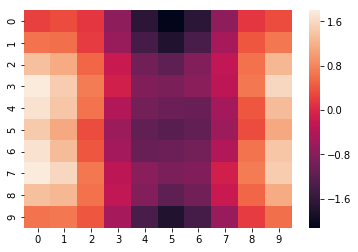

In [9]:
data_clustered=generate_fake_data(10,-3)
sns.heatmap(data_clustered)
coeff=wavedec2(data_clustered,'haar')

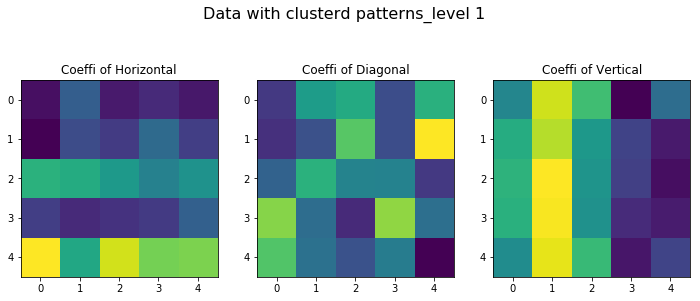

Mean of Horizontal_level(1)= 0.0
Mean of Diagonal_level(1)= -2.1649348980190553e-17
Mean of Vertical_level(1)= -0.007564850720664052

Standard Deviation of Horizontal_level(1)= 0.29685
Standard Deviation of Diagonal_level(1)= 0.05932
Standard Deviation of Vertical_level(1)= 0.60706

Variance of Horizontal_level(1)= 0.08812
Variance Deviation of Diagonal_level(1)= 0.00352
Variance Deviation of Vertical_level(1)= 0.36852

Sum of variance_level(1)= 0.46016



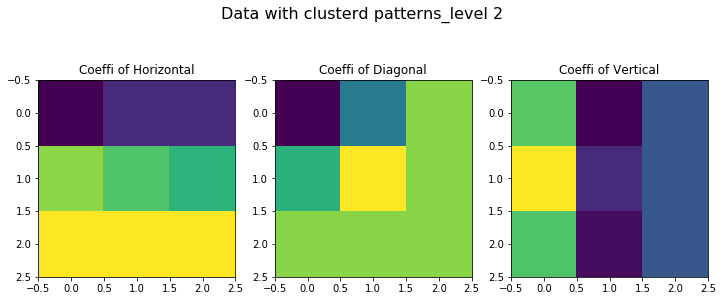

Mean of Horizontal_level(2)= -0.5878537408054751
Mean of Diagonal_level(2)= -0.08151983530607203
Mean of Vertical_level(2)= 0.44314988277106415

Standard Deviation of Horizontal_level(2)= 0.57870
Standard Deviation of Diagonal_level(2)= 0.17128
Standard Deviation of Vertical_level(2)= 1.35093

Variance of Horizontal_level(2)= 0.33490
Variance Deviation of Diagonal_level(2)= 0.02934
Variance Deviation of Vertical_level(2)= 1.82501

Sum of variance_level(2)= 2.18924



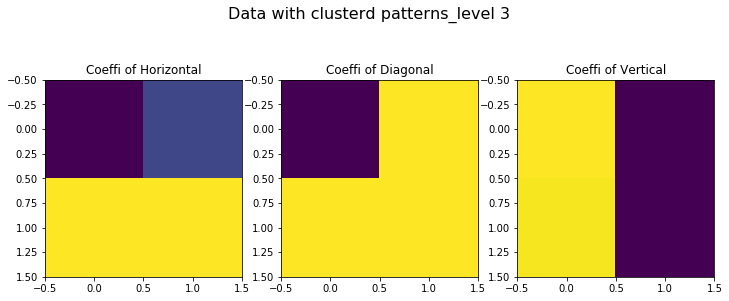

Mean of Horizontal_level(3)= -0.466722624543352
Mean of Diagonal_level(3)= -0.03997640418218586
Mean of Vertical_level(3)= 3.158476039211336

Standard Deviation of Horizontal_level(3)= 0.47330
Standard Deviation of Diagonal_level(3)= 0.06924
Standard Deviation of Vertical_level(3)= 3.15864

Variance of Horizontal_level(3)= 0.22401
Variance Deviation of Diagonal_level(3)= 0.00479
Variance Deviation of Vertical_level(3)= 9.97698

Sum of variance_level(3)= 10.20578



In [10]:
for i in range(len(coeff)-1):
    level=i+1
   
    cHn, cVn, cDn=coeff[-level]

    fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
    axes[0].imshow(cHn)
    axes[1].imshow(cDn)
    axes[2].imshow(cVn)
    fig.suptitle(f"Data with clusterd patterns_level {level}", fontsize=16,y=0.8)
    axes[0].set_title('Coeffi of Horizontal')
    axes[1].set_title('Coeffi of Diagonal')
    axes[2].set_title('Coeffi of Vertical')
    plt.show()
    print(f'Mean of Horizontal_level({level})= {cHn.mean()}')
    print(f'Mean of Diagonal_level({level})= {cDn.mean()}')
    print(f'Mean of Vertical_level({level})= {cVn.mean()}')
    print()
    print(f'Standard Deviation of Horizontal_level({level})= {cHn.std():.5f}')
    print(f'Standard Deviation of Diagonal_level({level})= {cDn.std():.5f}')
    print(f'Standard Deviation of Vertical_level({level})= {cVn.std():.5f}')
    print()
    print(f'Variance of Horizontal_level({level})= {cHn.var():.5f}')
    print(f'Variance Deviation of Diagonal_level({level})= {cDn.var():.5f}')
    print(f'Variance Deviation of Vertical_level({level})= {cVn.var():.5f}')
    print()
    sum_var=cHn.var() +cDn.var() +cVn.var()
    print(f'Sum of variance_level({level})= {sum_var:.5f}')
    print()